## Collecting images from the AIC

The AIC has an extensive API (https://api.artic.edu/docs/) that allows for collection of images. The preferred way is to download a large set of metadata, preselect on the basis of this metadata, and then download the image set.

Full metadata can be downloaded under the following link:
https://artic-api-data.s3.amazonaws.com/artic-api-data.tar.bz2

Honestly, I never really worked with querying large datasets, and this one in particular seems to be very weirdly organised. I will skip the manual download here and instead go with the master_list, which offers a pre-selection of images, and was used in a previous study on artwork memorability.

In [1]:
import pandas as pd

master_df = pd.read_csv('master_list.csv')
master_df.head()

,image_id,artwork_id,artist,width,height,aspect_ratio,colorfulness,HR,FAR,CR,RESMEM
0,583b892c-d2d9-ea0c-1cfb-719ee1207189,90335.0,Francis Picabia,3447,4023,0.856823,54.8520,0.976,0.024,0.952,0.836786
1,33b96726-572b-fdba-2020-078bf1a9efd4,73340.0,Marianne Boers,3000,2730,1.098901,77.0544,0.950,0.000,0.950,0.906281
2,28f20fcd-a5b3-04b3-2dc9-4c5c79ff7b6b,71978.0,Max Beckmann,3000,2100,1.428571,24.7851,0.927,0.000,0.927,0.934639
3,711f05a5-3186-6cc8-07ac-50896f804e86,NaN,Paul Cezanne,4019,5826,0.689839,19.3934,0.951,0.024,0.927,0.852770
4,099a5420-58c0-f29c-baaa-79019aadb48e,228850.0,Raimer Jochims,4666,3111,1.499839,52.0929,0.950,0.024,0.926,0.892886


We can for example plot the distribution of aspect ratios. 

<Axes: xlabel='aspect_ratio', ylabel='Count'>

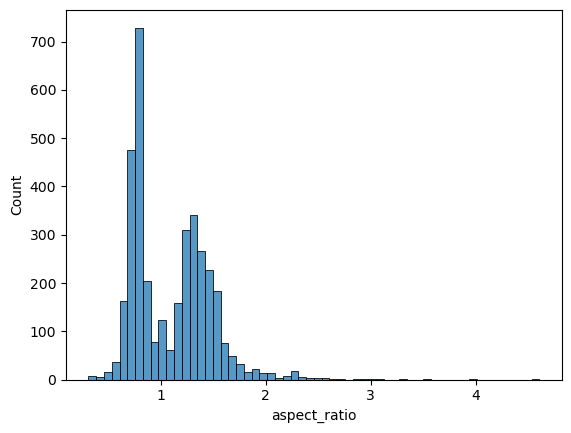

In [2]:
import seaborn as sns

sns.histplot(master_df['aspect_ratio'])

This shows us that most aspect ratios are below 1, with many also being under 2. We can now select for a small subset of these

(3659, 11)
(26, 11)


<Axes: xlabel='aspect_ratio', ylabel='Count'>

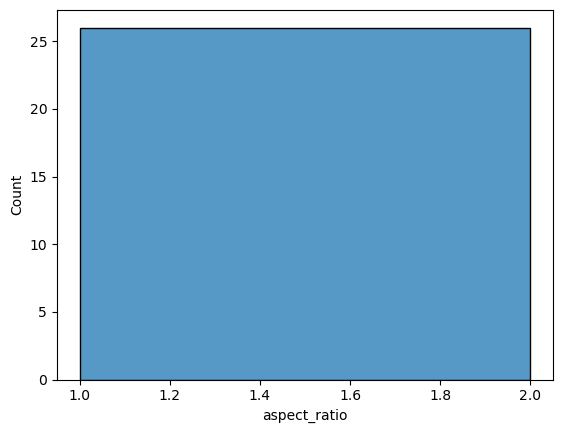

In [ ]:
#filter aspect rations equal to 1.5
print(master_df.shape)
filtered_df = master_df[(master_df['aspect_ratio'] == 1.5)]
print(filtered_df.shape)

We can now download these images by calling from AIC

In [5]:
import requests

#clear directory
import os
if not os.path.exists('image_collection'):
    os.makedirs('image_collection')
else:
    for f in os.listdir('image_collection'):
        os.remove(os.path.join('image_collection', f))

for image_id in filtered_df['image_id']:
    print(f"Downloading {image_id}")
    url = f"https://www.artic.edu/iiif/2/{image_id}/full/843,/0/default.jpg"
    download_path = f"image_collection/{image_id}.jpg"
    response = requests.get(url)
    if response.status_code == 200:
            with open(download_path, "wb") as f:
                for chunk in response.iter_content(1024):
                    f.write(chunk)
    else:
        print(f"Failed to download {download_path}")

print("Done")

Done
